<a href="https://colab.research.google.com/github/AbhishekSharda/Logistic_Regression_Hotel_Reservation_Cancellation_with_In_Depth_EDA/blob/main/Hotel_Reservation_Cancellation_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <B>PROBLEM STATEMENT</B>
In recent years, City Hotel and Resort Hotel have seen high cancellation rates, resulting in fewer revenues and less than ideal hotel room utilization. Lowering cancellation rates is a primary goal for both hotels to increase their efficiency in generating revenue. In this analysis, I aim to identify the factors that contribute to hotel booking cancellations and provide recommendations to address this problem.

Additionally, I aim to build a predictive model that can predict whether a customer will cancel their reservation or not, which can help hotels take proactive measures to reduce cancellations and improve their revenue generation.


## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
path = '/content/drive/MyDrive/Colab Notebooks/hotel_bookings 2.csv' 


In [4]:
data=pd.read_csv(path)

## Exploratory Data Analysis and Data Cleaning 

In [5]:
#Checkng features in dataset
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,1/7/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,1/7/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2/7/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2/7/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,3/7/2015


In [6]:
# Shape of dataset
data.shape

(119390, 32)

In [7]:
# Feature names
data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [9]:
# converting object type feature into datetime feature
data['reservation_status_date']=pd.to_datetime(data['reservation_status_date'])
data['reservation_status_date'].dtype

dtype('<M8[ns]')

In [10]:
# Checking statistics for categorical columns
data.describe(include='object')

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status
count,119390,119390,119390,118902,119390,119390,119390,119390,119390,119390,119390
unique,2,12,5,177,8,5,10,12,3,4,3
top,City Hotel,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out
freq,79330,13877,92310,48590,56477,97870,85994,74053,104641,89613,75166


In [11]:
# Checking Categorical features of dataset and unique values in each of them
obj_cols =[print(col + ': ' + str(data[col].unique()) + '\n' + '-' * 50) for col in data.columns if data[col].dtype == 'object']


hotel: ['Resort Hotel' 'City Hotel']
--------------------------------------------------
arrival_date_month: ['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']
--------------------------------------------------
meal: ['BB' 'FB' 'HB' 'SC' 'Undefined']
--------------------------------------------------
country: ['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' nan 'ROU' 'NOR' 'OMN' 'ARG' 'POL'
 'DEU' 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS' 'EST'
 'CZE' 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX' 'MAR'
 'UKR' 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF' 'AGO'
 'ISR' 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN' 'JAM'
 'HRV' 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL' 'GGY'
 'KWT' 'NGA' 'MDV' 'VEN' 'SVK' 'FJI' 'KAZ' 'PAK' 'IDN' 'LBN' 'PHL' 'SEN'
 'SYC' 'AZE' 'BHR' 'NZL' 'THA' 'DOM' 'MKD' 'MYS' 'ARM' 'JPN' 'LKA' 'CUB'
 'CMR' 'BIH' 'MUS' 'COM' 'SUR' 'UGA' 'BGR' 'CIV

In [12]:
#Checking missing values
data.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [13]:
# Removing 'agent' and 'company' features  because they have lot of missing values 
data.drop(['agent','company'],axis=1,inplace= True)
# Removing rows with missing values for 'country'
data.dropna(inplace=True)

In [14]:
#Checking missing values again after dropping missing values
data.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

In [15]:
#Summary statistics of numerical coloumns
data.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000
mean,0.371352,104.311435,2016.157656,27.166555,15.800880,0.928897,2.502145,1.858391,0.104207,0.007948,0.032011,0.087142,0.131634,0.221181,2.330754,102.003243,0.061885,0.571683
std,0.483168,106.903309,0.707459,13.589971,8.780324,0.996216,1.900168,0.578576,0.399172,0.097380,0.176029,0.845869,1.484672,0.652785,17.630452,50.485862,0.244172,0.792678
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.000000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95.000000,0.000000,0.000000
75%,1.000000,161.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,16.000000,41.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,5400.000000,8.000000,5.000000


In [16]:
# Handling outliers in babies and children columns 
data['babies'] = data['babies'].clip(upper=3)
data['children'] = data['children'].clip(upper=3)

In [17]:
# Handling outliers for average daily rate 
data=data[data['adr']<5000]

In [18]:
#Checking statistics after handling few outliers
data.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000
mean,0.371347,104.312018,2016.157657,27.166674,15.800802,0.928905,2.502157,1.858390,0.104149,0.007839,0.032011,0.087143,0.131635,0.221175,2.330774,101.958683,0.061885,0.571688
std,0.483167,106.903570,0.707462,13.589966,8.780321,0.996217,1.900171,0.578578,0.398229,0.090076,0.176030,0.845872,1.484678,0.652784,17.630525,48.091199,0.244173,0.792680
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.000000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95.000000,0.000000,0.000000
75%,1.000000,161.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,16.000000,41.000000,55.000000,3.000000,3.000000,1.000000,26.000000,72.000000,21.000000,391.000000,510.000000,8.000000,5.000000


## <b>Data Analysis and Visualisations</b>

In [19]:
# Percentage of cancellations from 2015-2017
cancelled_perc=data['is_canceled'].value_counts(normalize=True)
cancelled_perc

0    0.628653
1    0.371347
Name: is_canceled, dtype: float64

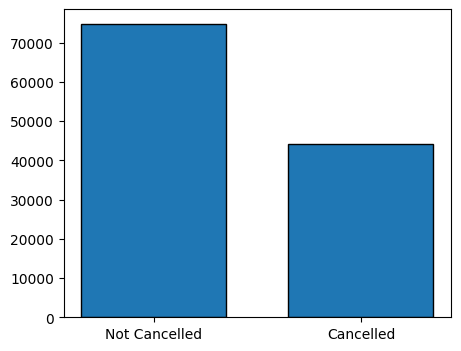

In [20]:
# Plotting Percentage of cancellations from 2015-2017

plt.figure(figsize=(5,4))
plt.title('')
plt.bar(['Not Cancelled','Cancelled'],data['is_canceled'].value_counts(),edgecolor='k', width=0.7)
plt.show()

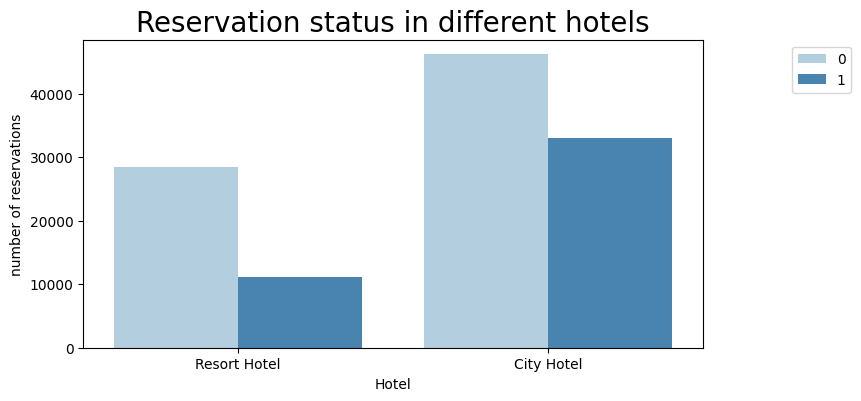

In [21]:
# Plotting reservation status in different hotels 
plt.figure(figsize=(8,4))
ax1=sns.countplot(x='hotel',hue='is_canceled',data=data,palette='Blues')
ax1.legend(loc='upper right', bbox_to_anchor=(1.25, 1))
plt.title('Reservation status in different hotels',size=20)
plt.xlabel('Hotel')
plt.ylabel('number of reservations')
plt.show()

In [22]:
# getting values of 'Resort hotel' for cancelled and not_cancelled values
resort_hotel=data[data['hotel']=='Resort Hotel']
resort_hotel['is_canceled'].value_counts(normalize=True)

0    0.72025
1    0.27975
Name: is_canceled, dtype: float64

In [23]:
# getting values of 'City hotel' for cancelled and not_cancelled values
city_hotel=data[data['hotel']=='City Hotel']
city_hotel['is_canceled'].value_counts(normalize=True)

0    0.582918
1    0.417082
Name: is_canceled, dtype: float64

In [24]:
# Checking if price is affecting the cancellations
resort_hotel = resort_hotel.groupby('reservation_status_date')[['adr']].mean()
city_hotel = city_hotel.groupby('reservation_status_date')[['adr']].mean()

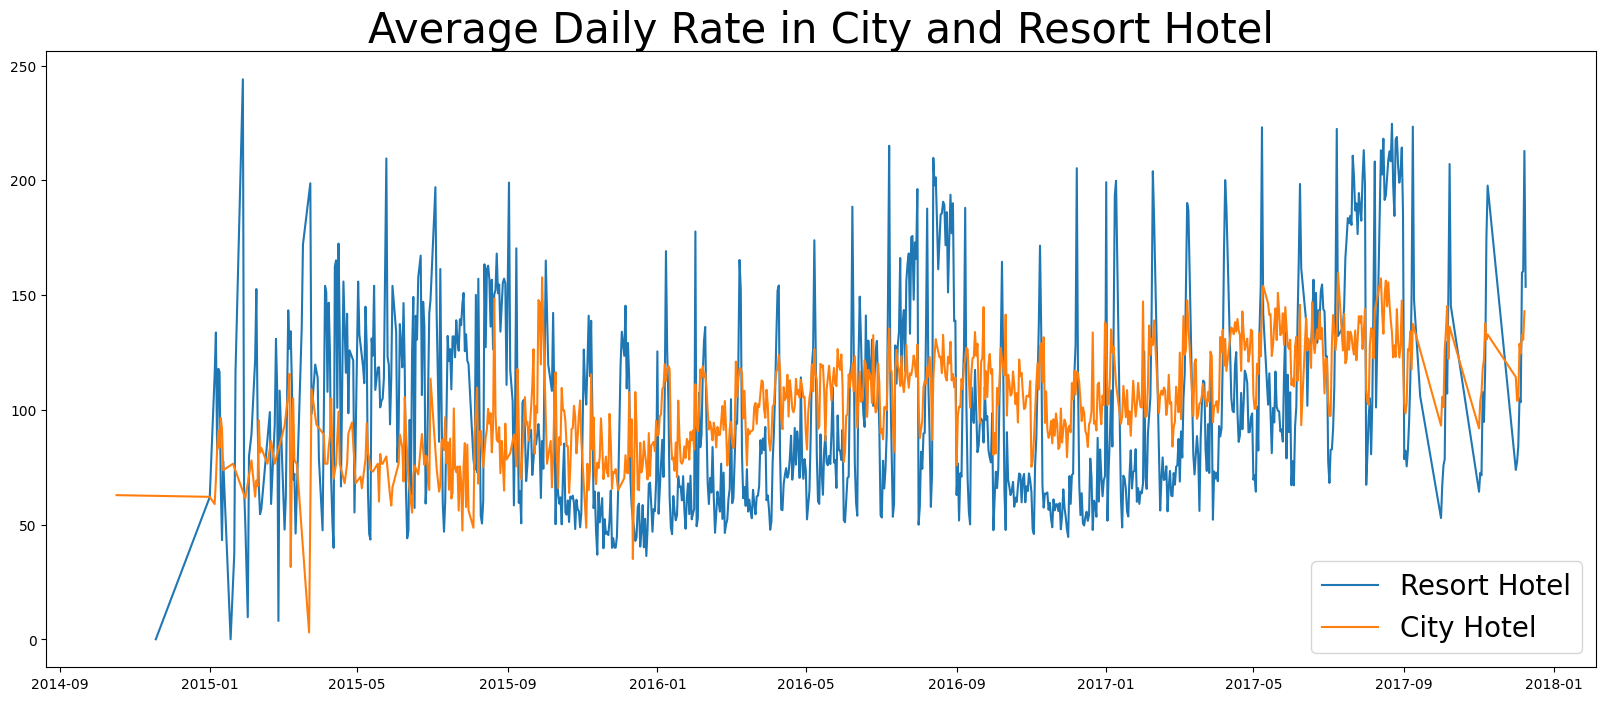

In [25]:
# Plotting Average Daily Rate in City and resort Hotel
plt.figure(figsize=(20,8))
plt.title('Average Daily Rate in City and Resort Hotel',fontsize=30)
plt.plot(resort_hotel.index,resort_hotel['adr'],label='Resort Hotel')
plt.plot(city_hotel.index,city_hotel['adr'],label='City Hotel')
plt.legend(fontsize=20)
plt.show()

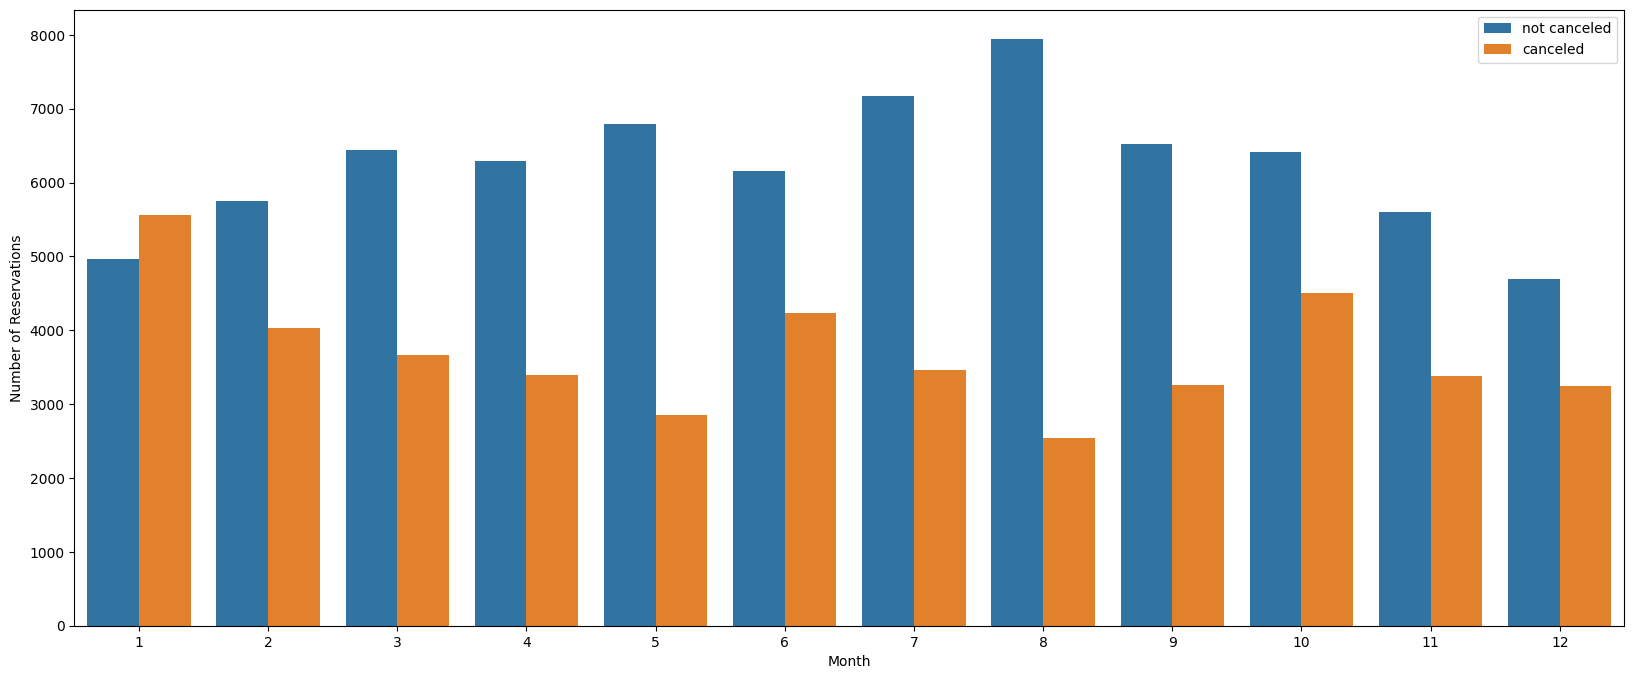

In [26]:
#Checking which months have highest reservations and which months have highest cancellations
data['month']=data['reservation_status_date'].dt.month
plt.figure(figsize=(20,8))
ax1=sns.countplot(x='month',hue='is_canceled',data=data)
plt.xlabel("Month")
plt.ylabel("Number of Reservations")
plt.legend(["not canceled","canceled"])
plt.show()


<Axes: >

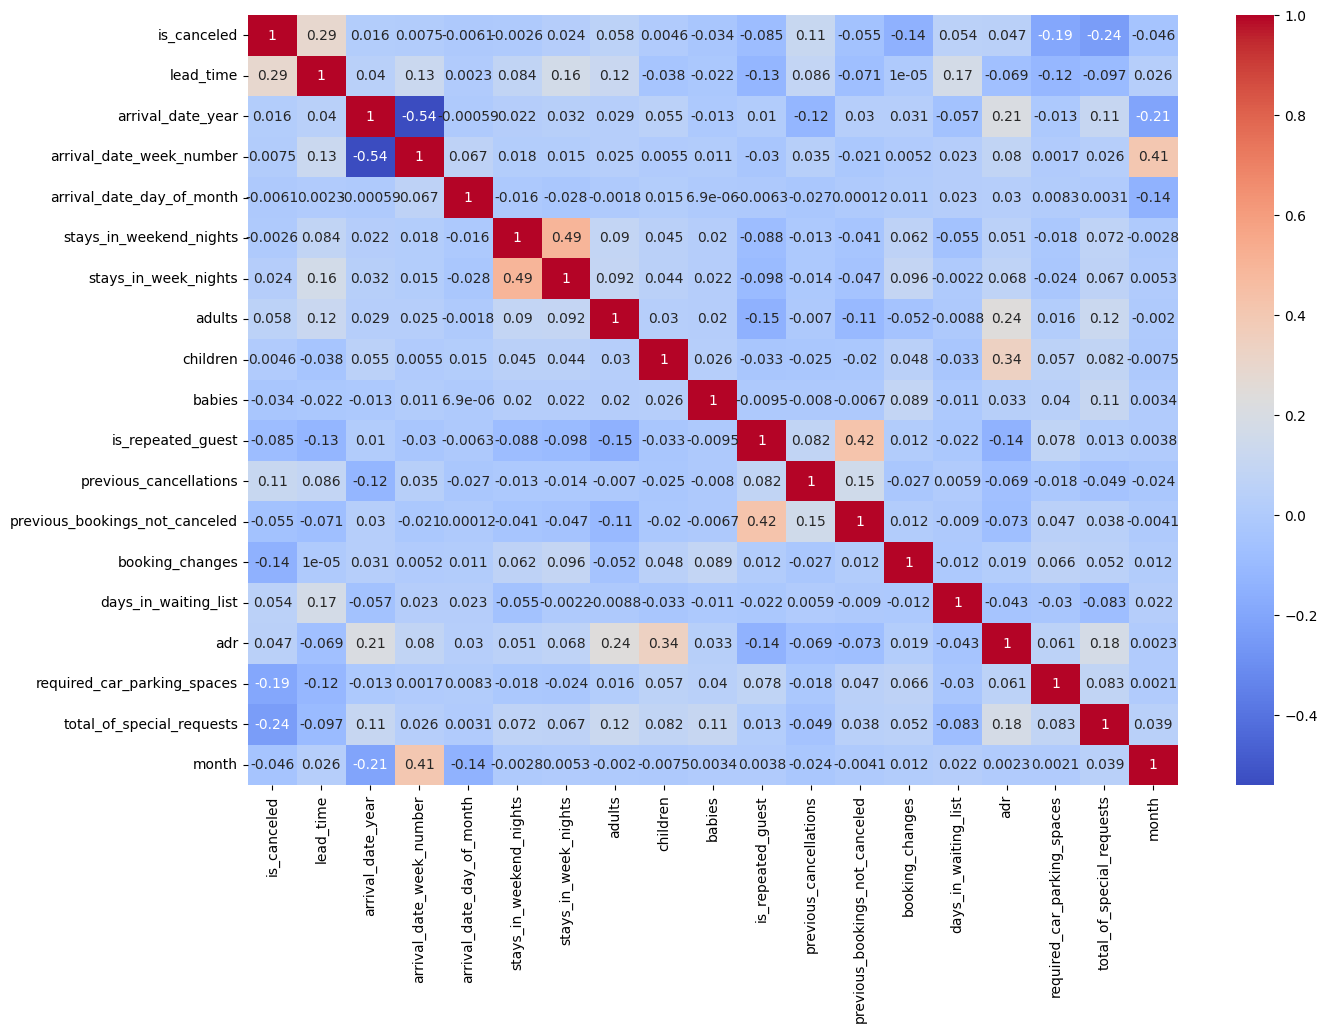

In [27]:
# Creating a correlation matrix for the data
corr_matrix = data.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

# OBSERAVTIONS AND RECOMMENDATIONS
1. Lot of reservations are still not being cancelled, however cancelled 
   reservations(around 37%) will result in dip of revenue.

2. City hotel has more bookings than Resort hotel, the reason for same could be 
   higher prices, which I proved through line graph.

3. August has the highest reservations and January has highest cancellations as 
   seen in bar graph.

4. Portugal has highest number of cancellations 

5. Around 46% of clients come from Online travel agencies

6. Reservations are cancelled when average daily rate is higher when compared 
   to reservation not cancelled


In [28]:
df=data.copy()

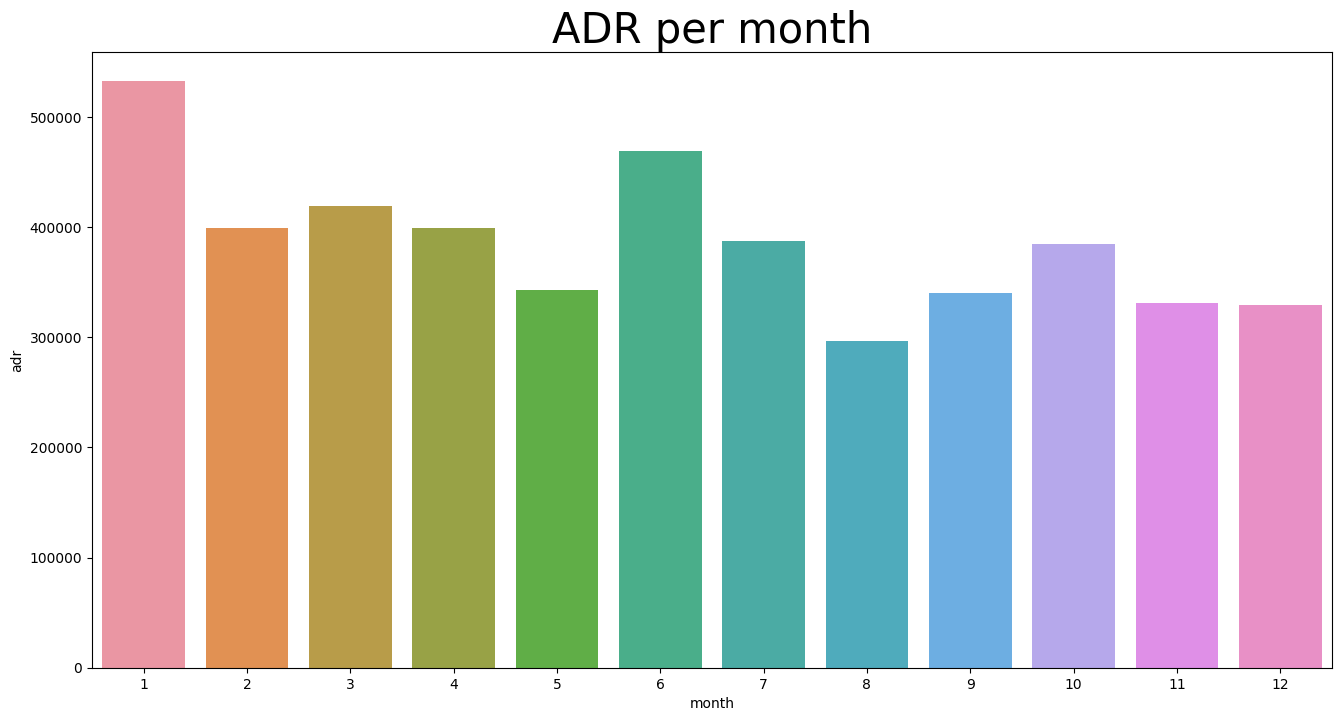

In [29]:
# Plotting Average Daily Rate per month for all cancelled resrvations
plt.figure(figsize=(16,8))
plt.title('ADR per month',fontsize=30)
sns.barplot(x='month', y='adr', data=df[df['is_canceled']==1].groupby('month')[['adr']].sum().reset_index())
plt.show()

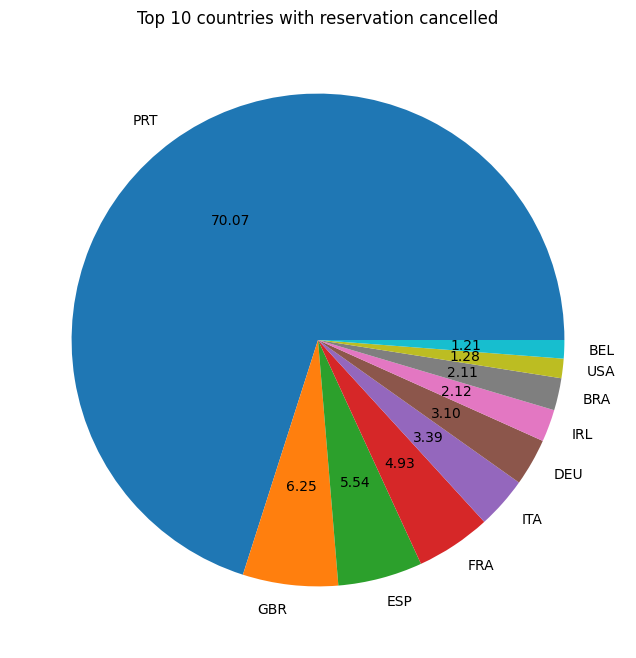

In [30]:
# Checking cancellation rate by top 10  countries
cancelled_data=data[data['is_canceled']==1]
top_10_countries=cancelled_data['country'].value_counts()[:10]
plt.figure(figsize=(10,8))
plt.title('Top 10 countries with reservation cancelled')
plt.pie(top_10_countries,autopct='%.2f',labels=top_10_countries.index)
plt.show()


In [31]:
#checking if customers are booking  online or offline for hotel stays
data['market_segment'].value_counts(normalize=True)

Online TA        0.474377
Offline TA/TO    0.203193
Groups           0.166581
Direct           0.104696
Corporate        0.042987
Complementary    0.006173
Aviation         0.001993
Name: market_segment, dtype: float64

In [32]:
cancelled_data['market_segment'].value_counts(normalize=True)

Online TA        0.469696
Groups           0.273985
Offline TA/TO    0.187466
Direct           0.043486
Corporate        0.022151
Complementary    0.002038
Aviation         0.001178
Name: market_segment, dtype: float64

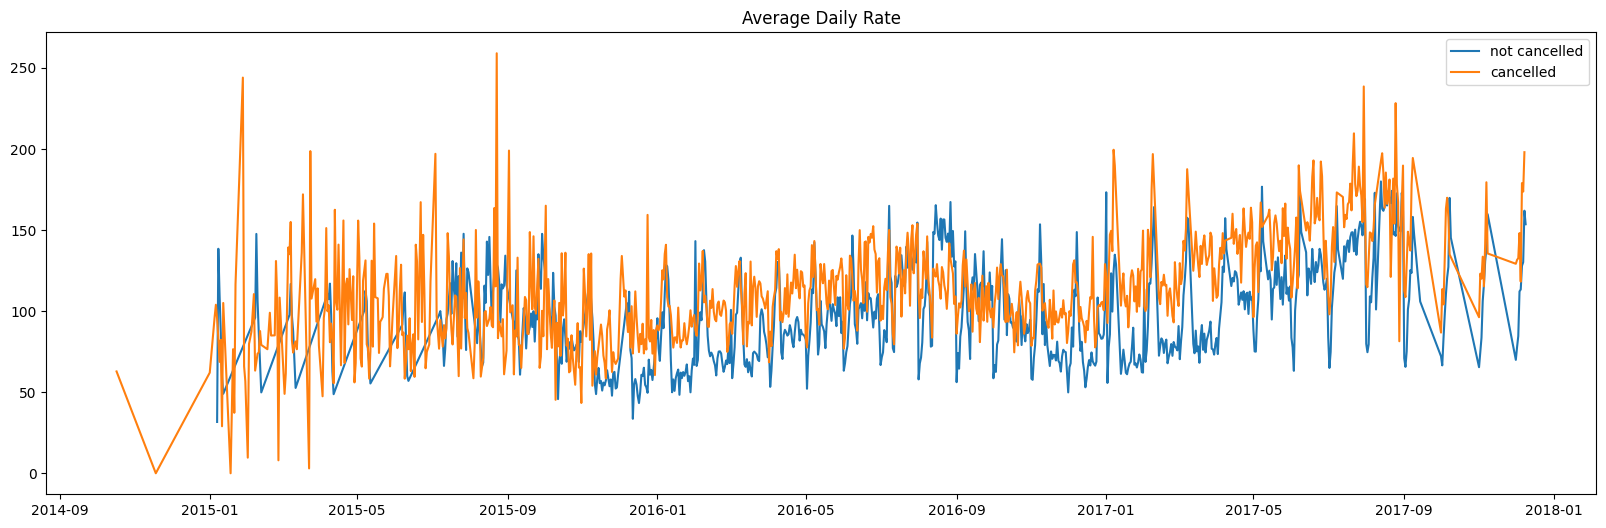

In [33]:
# Creating a line plot of the average daily rate (ADR) of cancelled and not cancelled reservations over time
cancelled_df_adr=cancelled_data.groupby('reservation_status_date')[['adr']].mean()
cancelled_df_adr.reset_index(inplace=True)
cancelled_df_adr.sort_values('reservation_status_date',inplace=True)

not_cancelled_data=data[data['is_canceled']==0]
not_cancelled_df_adr=not_cancelled_data.groupby('reservation_status_date')[['adr']].mean()
not_cancelled_df_adr.reset_index(inplace=True)
not_cancelled_df_adr.sort_values('reservation_status_date',inplace=True)

plt.figure(figsize=(20,6))
plt.title("Average Daily Rate")
plt.plot(not_cancelled_df_adr['reservation_status_date'],not_cancelled_df_adr['adr'],label='not cancelled')
plt.plot(cancelled_df_adr['reservation_status_date'],cancelled_df_adr['adr'],label='cancelled')
plt.legend()




## Plotting Outliers for all features before modelling

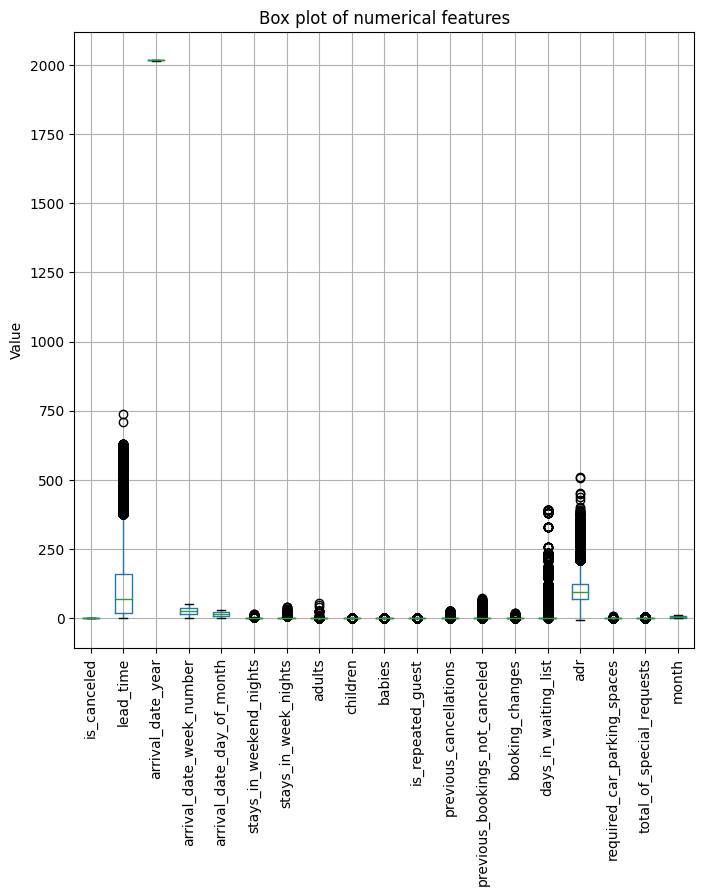

In [34]:
# Selecting numerical columns
num_cols = data.select_dtypes(include=['float64', 'int64'])

# Creating box plot for each numerical column
num_cols.boxplot(figsize=(8, 8))

# Setting title and labels for the plot
plt.title('Box plot of numerical features')
plt.xticks(rotation=90)
plt.ylabel('Value')

plt.show()

Since outliers are still present, it will interfere in model's performance. Hence will impute with median to handle outliers

In [35]:
# calculating median of the columns
lead_time_median = data['lead_time'].median()
days_in_waiting_list_median = data['days_in_waiting_list'].median()
adr_median = data['adr'].median()

# replacing outliers with median
data.loc[data['lead_time'] > lead_time_median*3, 'lead_time'] = lead_time_median
data.loc[data['days_in_waiting_list'] > days_in_waiting_list_median*3, 'days_in_waiting_list'] = days_in_waiting_list_median
data.loc[data['adr'] > adr_median*3, 'adr'] = adr_median

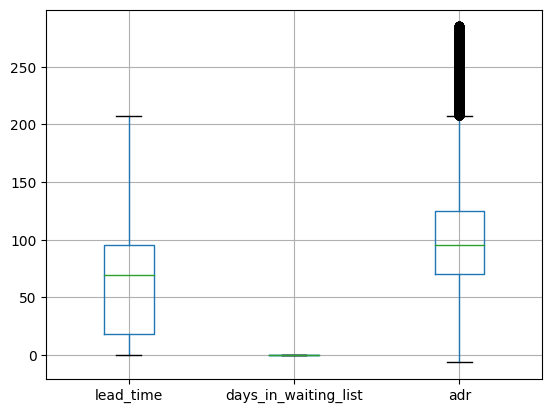

In [36]:
data[['lead_time', 'days_in_waiting_list', 'adr']].boxplot()
plt.show()

In [37]:
# creating a new DataFrame with only categorical columns
cat_df = data.select_dtypes(include=['object'])

# Applying one-hot encoding to the categorical columns
one_hot_encoded = pd.get_dummies(cat_df)

# dropping the original categorical columns from the DataFrame
data = data.drop(columns=cat_df.columns)

# merging the one-hot encoded columns with the original DataFrame
data = pd.concat([data, one_hot_encoded], axis=1)

In [38]:
data.shape

(118897, 260)

In [39]:
# Extracting day and year from reservation_status_date
data['reservation_status_day'] = data['reservation_status_date'].dt.day
data['reservation_status_year'] = data['reservation_status_date'].dt.year

# Converting day and year to numerical values
data['reservation_status_day'] = pd.to_numeric(data['reservation_status_day'])
data['reservation_status_year'] = pd.to_numeric(data['reservation_status_year'])

In [40]:
data.dtypes

is_canceled                     int64
lead_time                       int64
arrival_date_year               int64
arrival_date_week_number        int64
arrival_date_day_of_month       int64
                                ...  
reservation_status_Canceled     uint8
reservation_status_Check-Out    uint8
reservation_status_No-Show      uint8
reservation_status_day          int64
reservation_status_year         int64
Length: 262, dtype: object

In [41]:
datetime_cols = data.select_dtypes(include='datetime').columns.tolist()

print(datetime_cols)

['reservation_status_date']


In [42]:
data = data.drop('reservation_status_date', axis=1)


Splitting data

In [43]:
#importing required libraries and modules
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Splitting data into training and testing sets
X = data.drop('is_canceled', axis=1)
y = data['is_canceled']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [44]:
# Using Standard Scaler to standardize the training data

scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)

# Applying PCA on the standardized training data
pca = PCA(n_components=10)
X_train_pca = pca.fit_transform(X_train_std)

# Transforming  testing data using fitted scaler and PCA model
X_test_std = scaler.transform(X_test)
X_test_pca = pca.transform(X_test_std)

## Modelling

#### Logistic Regression

In [45]:
#importing required module
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
clf.fit(X_train_pca, y_train)

# Predicting the labels of the test data
y_pred = clf.predict(X_test_pca)

# Evaluating  model performance
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9806840482197925
Confusion matrix:
 [[22081   259]
 [  430 12900]]
Classification report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.98     22340
           1       0.98      0.97      0.97     13330

    accuracy                           0.98     35670
   macro avg       0.98      0.98      0.98     35670
weighted avg       0.98      0.98      0.98     35670



CROSS VALIDATION

In [46]:
from sklearn.model_selection import cross_val_score

# creating logistic regression model
logreg = LogisticRegression()

scores = cross_val_score(logreg, X_train_pca, y_train, cv=5)

# print the mean score and standard deviation
print('Cross-validation scores: {}'.format(scores))
print('Average cross-validation score: {:.2f}'.format(scores.mean()))
print('Standard deviation of cross-validation score: {:.2f}'.format(scores.std()))

Cross-validation scores: [0.98077616 0.98113661 0.97939321 0.98095524 0.9816161 ]
Average cross-validation score: 0.98
Standard deviation of cross-validation score: 0.00


HYPERPARAMETER TUNING USING GRID SEARCH CV

In [47]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Create a logistic regression object
lr = LogisticRegression()

# Defining the hyperparameters and their possible values as a dictionary
param_grid = {'penalty': ['l1', 'l2'],
              'C': [0.1, 1, 10, 100]}

# Create a GridSearchCV object with the logistic regression object and the dictionary of hyperparameters
grid_search = GridSearchCV(lr, param_grid, cv=5)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train_pca, y_train)

# Print the best hyperparameters and the corresponding accuracy score
print("Best hyperparameters: ", grid_search.best_params_)
print("Accuracy score: ", grid_search.best_score_)

Best hyperparameters:  {'C': 1, 'penalty': 'l2'}
Accuracy score:  0.9807754651514349


In [48]:
# Fitting the logistic regression model on training data using the best hyperparameters

from sklearn.metrics import accuracy_score
logreg = LogisticRegression(C=1, penalty='l2')
logreg.fit(X_train_pca, y_train)

y_pred = logreg.predict(X_test_pca)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy score: ", accuracy)

Accuracy score:  0.9806840482197925


In [49]:
# Train the model using the best hyperparameters
logreg = LogisticRegression(C=1, penalty='l2')
logreg.fit(X_train_pca, y_train)

# Evaluating the model on the test set
y_pred = logreg.predict(X_test_pca)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy score: ", accuracy)

Accuracy score:  0.9806840482197925


In [50]:
import pickle
with open('model.pkl', 'wb') as f:
    pickle.dump(logreg, f)